### Etymology Prefix Suffix Analysis

In [1]:
import os
import pandas as pd
import numpy as np
import glob
import re
from kneed import KneeLocator
from pathlib import Path
import shutil

In [2]:
# language pair
lang_folder = "Turkish"  # Arabic, English, French, German, Turkish, Spanish, Portuguese, Dutch, Italian ==> target language for learner
lang_pair = "English"  # Arabic, English, French, German, Turkish, Spanish, Portuguese, Dutch, Italian ==> native language

# pre-suffix select
prefix = True  # True, False  word is prefix  example: prefix = True and suffix = False for Turkish word
suffix = False # True, False  word is suffix

# native word select
word_analysis = True  # True, False  Not: True for native word analysis, False for etymological word analysis
file_ext = 5000
word_start = 1000  # 0  # native word start index
word_end = 5000  # 28  # native word end index


In [3]:
Path(f"/media/kurubal/SSD/Data Scientist/Work/Modern Ways/Project/Web Scrapping/Data/{lang_folder.capitalize()}/{lang_folder.capitalize()} {lang_pair.capitalize()}").mkdir(parents=True, exist_ok=True)
Path(f"/media/kurubal/SSD/Data Scientist/Work/Modern Ways/Project/Web Scrapping/Result/{lang_folder.capitalize()}/{lang_folder.capitalize()} {lang_pair.capitalize()}").mkdir(parents=True, exist_ok=True)

### Prefix Suffix Analysis

In [4]:
def detect_prefix_suffix_word(df, df_column, word_ety_list, prefix_word=True, suffix_word=False):
    '''
    default parameter:\n
    detect_prefix_suffix_word(df, df_column, word_ety_list, prefix_word=True, suffix_word=False)\n
    detect_prefix_suffix_word(df, "word", ["abacus","aba","su"], prefix=True, suffix=True)\n
    df is dataframe. Each word of word_ety_list search in df_column according to prefix_word and suffix_word condition.\n
    prefix_word and suffix_word are not extention. they represents location of word of word_ety_list (word before or after)
    '''    
    df_ety_prefix_suffix_word_result = pd.DataFrame()
    for i in word_ety_list:
        # suffix result
        if suffix_word:
            #word_ety_in_word = df[df[f"{df_column}"].str.contains(fr"{i}(?:$)", na=True)]  # string+ext=> word
            word_ety_in_word = df[df[f"{df_column}"].str.contains(fr"{i}(?:$)", na=False)]
            word_ety_in_word.insert(0,"search_word",i)
            df_ety_prefix_suffix_word_result = pd.concat([df_ety_prefix_suffix_word_result,word_ety_in_word], axis=0)
        else:
            pass
        # prefix result
        if prefix_word:
            #word_ety_in_word = df[df[f"{df_column}"].str.contains(fr"(?:^){i}", na=True)]  # ext+string=> word
            word_ety_in_word = df[df[f"{df_column}"].str.contains(fr"(?:^){i}", na=False)]
            word_ety_in_word.insert(0,"search_word",i)
            df_ety_prefix_suffix_word_result = pd.concat([df_ety_prefix_suffix_word_result,word_ety_in_word], axis=0)
        else:
            pass    
        
    #df_ety_suffix_word_result = df_word_result.sort_values(by="frequency", ascending=False)
    df_ety_prefix_suffix_word_result.drop_duplicates(inplace=True)
    df_ety_prefix_suffix_word_result.reset_index(drop=True, inplace=True)

    return df_ety_prefix_suffix_word_result 

In [5]:
def exract_prefix_suffix(df, source_column, target_column):
    '''
    exract_prefix_suffix(df, source_column, target_column):\n
    exract_prefix_suffix(df, "word_pair", "word"):\n
    df is dataframe. word of source_column search in target_column\n
    and exract prefix or suffix. 
    '''
    for i in range(len(df)):
        source_word = df.loc[i,f"{source_column}"]
        target_word = df.loc[i,f"{target_column}"]
        try:
            search_loc = re.search(fr"{source_word}", target_word, re.UNICODE|re.IGNORECASE)
            search_loc_start = search_loc.span()[0]
            search_loc_end = search_loc.span()[1]
            if search_loc_start > 0:
                var1= target_word[0:search_loc_start]
                prefix_suffix = f"{var1}+"
                df.loc[i,"prefix_suffix"] = prefix_suffix                
            else:
                var2 = target_word[search_loc_end:]
                prefix_suffix = f"+{var2}" 
                df.loc[i,"prefix_suffix"] = prefix_suffix 
        except:
            pass
    return df

##### Prefix Suffix All

In [6]:
df_word_all = pd.read_excel(f"/media/kurubal/SSD/Data Scientist/Work/Modern Ways/Project/{lang_folder.lower().capitalize()}/Deployment/Data/Word/Word_Merge_Preprocess.xlsx")
df_word_all

,word,frequency
0,bir,18835735
1,bu,11062659
2,ne,8025880
3,ve,7766036
4,için,5484109
...,...,...
988212,karneleme,5
988213,karnaya,5
988214,dörtlümüzün,5
988215,karnavalınız,5


In [7]:
if word_analysis:
    df_pair = pd.read_excel(f"/media/kurubal/SSD/Data Scientist/Work/Modern Ways/Project/{lang_folder.lower().capitalize()}/Deployment/Data/Word/Word_Merge_Preprocess.xlsx")
    #df_pair = df_pair.head(word_num)
    df_pair = df_pair.iloc[word_start:word_end,]
    df_pair.rename(columns={"word":"dict_entry_main"}, inplace=True)
else:
    df_pair = pd.read_excel(f"/media/kurubal/SSD/Data Scientist/Work/Modern Ways/Project/Web Scrapping/Result/{lang_folder.capitalize()}/{lang_folder.capitalize()} {lang_pair.capitalize()}/{lang_folder.capitalize()}_{lang_pair.capitalize()}_Shared_Vocabulary.xlsx")
df_pair

,dict_entry_main,frequency
1000,hale,70625
1001,kavga,70611
1002,arabayı,70310
1003,oldun,70121
1004,bölüm,69859
...,...,...
4995,rüyalar,12472
4996,salonu,12471
4997,tekrardan,12469
4998,telsiz,12468


In [8]:
word_ety_list = df_pair["dict_entry_main"].values.tolist()
#word_ety_list

In [9]:
df_prefix_suffix_word = detect_prefix_suffix_word(df_word_all, "word", word_ety_list, prefix_word=prefix, suffix_word=suffix)
df_prefix_suffix_word

,search_word,word,frequency
0,hale,hale,70625
1,hale,halen,18440
2,hale,halefi,531
3,hale,haleynin,497
4,hale,halein,409
...,...,...,...
1159145,olanlara,olanlara,12461
1159146,olanlara,olanlaradır,8
1159147,olanlara,olanlaratavsiye,7
1159148,olanlara,olanlarasla,7


In [10]:
df_prefix_suffix = exract_prefix_suffix(df_prefix_suffix_word, "search_word", "word")
df_prefix_suffix

,search_word,word,frequency,prefix_suffix
0,hale,hale,70625,+
1,hale,halen,18440,+n
2,hale,halefi,531,+fi
3,hale,haleynin,497,+ynin
4,hale,halein,409,+in
...,...,...,...,...
1159145,olanlara,olanlara,12461,+
1159146,olanlara,olanlaradır,8,+dır
1159147,olanlara,olanlaratavsiye,7,+tavsiye
1159148,olanlara,olanlarasla,7,+sla


In [11]:
df_prefix_suffix.search_word.nunique()

4000

In [12]:
df_prefix_suffix.word.nunique()

742485

In [14]:
if word_analysis:
    try:
        df_prefix_suffix.to_excel(f"{lang_folder.capitalize()}_{lang_pair.capitalize()}_{file_ext}_Word_Prefix_Suffix_All.xlsx", index=False)
    except:
        df_prefix_suffix.to_csv(f"{lang_folder.capitalize()}_{lang_pair.capitalize()}_{file_ext}_Word_Prefix_Suffix_All.csv", index=False)
else:
    try:
        df_prefix_suffix.to_excel(f"{lang_folder.capitalize()}_{lang_pair.capitalize()}_Shared_Word_Prefix_Suffix_All.xlsx", index=False)
    except:
        df_prefix_suffix.to_csv(f"{lang_folder.capitalize()}_{lang_pair.capitalize()}_Shared_Word_Prefix_Suffix_All.csv", index=False)

##### Select From Length

In [15]:
if word_analysis:
    try:
        df_prefix_suffix = pd.read_excel(f"{lang_folder.capitalize()}_{lang_pair.capitalize()}_{file_ext}_Word_Prefix_Suffix_All.xlsx")
    except:
        df_prefix_suffix = pd.read_csv(f"{lang_folder.capitalize()}_{lang_pair.capitalize()}_{file_ext}_Word_Prefix_Suffix_All.csv")
else:
    try:
        df_prefix_suffix = pd.read_excel(f"{lang_folder.capitalize()}_{lang_pair.capitalize()}_Shared_Word_Prefix_Suffix_All.xlsx")
    except:
        df_prefix_suffix = pd.read_csv(f"{lang_folder.capitalize()}_{lang_pair.capitalize()}_Shared_Word_Prefix_Suffix_All.csv")        

df_prefix_suffix

,search_word,word,frequency,prefix_suffix
0,hale,hale,70625,+
1,hale,halen,18440,+n
2,hale,halefi,531,+fi
3,hale,haleynin,497,+ynin
4,hale,halein,409,+in
...,...,...,...,...
1159145,olanlara,olanlara,12461,+
1159146,olanlara,olanlaradır,8,+dır
1159147,olanlara,olanlaratavsiye,7,+tavsiye
1159148,olanlara,olanlarasla,7,+sla


In [16]:
df_prefix_suffix["prefix_suffix_len"] = df_prefix_suffix["prefix_suffix"].apply(lambda x: (len(x)-1))
df_prefix_suffix

,search_word,word,frequency,prefix_suffix,prefix_suffix_len
0,hale,hale,70625,+,0
1,hale,halen,18440,+n,1
2,hale,halefi,531,+fi,2
3,hale,haleynin,497,+ynin,4
4,hale,halein,409,+in,2
...,...,...,...,...,...
1159145,olanlara,olanlara,12461,+,0
1159146,olanlara,olanlaradır,8,+dır,3
1159147,olanlara,olanlaratavsiye,7,+tavsiye,7
1159148,olanlara,olanlarasla,7,+sla,3


In [17]:
prefix_suffix_mean = int(round(df_prefix_suffix["prefix_suffix_len"].mean(),0))
prefix_suffix_mean

8

In [18]:
df_prefix_suffix_select = df_prefix_suffix[df_prefix_suffix["prefix_suffix"].str.len() <= prefix_suffix_mean]
df_prefix_suffix_select

,search_word,word,frequency,prefix_suffix,prefix_suffix_len
0,hale,hale,70625,+,0
1,hale,halen,18440,+n,1
2,hale,halefi,531,+fi,2
3,hale,haleynin,497,+ynin,4
4,hale,halein,409,+in,2
...,...,...,...,...,...
1159145,olanlara,olanlara,12461,+,0
1159146,olanlara,olanlaradır,8,+dır,3
1159147,olanlara,olanlaratavsiye,7,+tavsiye,7
1159148,olanlara,olanlarasla,7,+sla,3


In [19]:
if word_analysis:
    try:
        df_prefix_suffix_select.to_excel(f"{lang_folder.capitalize()}_{lang_pair.capitalize()}_{file_ext}_Word_Prefix_Suffix_Select.xlsx", index=False)
    except:
        df_prefix_suffix_select.to_csv(f"{lang_folder.capitalize()}_{lang_pair.capitalize()}_{file_ext}_Word_Prefix_Suffix_Select.csv", index=False)
else:
    try:
        df_prefix_suffix_select.to_excel(f"{lang_folder.capitalize()}_{lang_pair.capitalize()}_Shared_Word_Prefix_Suffix_Select.xlsx", index=False)
    except:
        df_prefix_suffix_select.to_csv(f"{lang_folder.capitalize()}_{lang_pair.capitalize()}_Shared_Word_Prefix_Suffix_Select.csv", index=False)

##### Select With Prefix Suffix

In [20]:
if word_analysis:
    try:
        df_prefix_suffix_select = pd.read_excel(f"{lang_folder.capitalize()}_{lang_pair.capitalize()}_{file_ext}_Word_Prefix_Suffix_Select.xlsx")
    except:
        df_prefix_suffix_select = pd.read_csv(f"{lang_folder.capitalize()}_{lang_pair.capitalize()}_{file_ext}_Word_Prefix_Suffix_Select.csv")
else:
    try:
        df_prefix_suffix_select = pd.read_excel(f"{lang_folder.capitalize()}_{lang_pair.capitalize()}_Shared_Word_Prefix_Suffix_Select.xlsx")
    except:
        df_prefix_suffix_select = pd.read_csv(f"{lang_folder.capitalize()}_{lang_pair.capitalize()}_Shared_Word_Prefix_Suffix_Select.csv")
        
df_prefix_suffix_select

,search_word,word,frequency,prefix_suffix,prefix_suffix_len
0,hale,hale,70625,+,0
1,hale,halen,18440,+n,1
2,hale,halefi,531,+fi,2
3,hale,haleynin,497,+ynin,4
4,hale,halein,409,+in,2
...,...,...,...,...,...
575103,olanlara,olanlara,12461,+,0
575104,olanlara,olanlaradır,8,+dır,3
575105,olanlara,olanlaratavsiye,7,+tavsiye,7
575106,olanlara,olanlarasla,7,+sla,3


In [21]:
df_prefix_suffix_freq = df_prefix_suffix_select[["prefix_suffix"]].value_counts().reset_index()
df_prefix_suffix_freq.rename(columns={0:"frequency"}, inplace=True)
df_prefix_suffix_freq

,prefix_suffix,frequency
0,+,4000
1,+n,1308
2,+m,912
3,+lar,872
4,+ler,810
...,...,...
269950,+idiayı,1
269951,+idice,1
269952,+idicede,1
269953,+idicek,1


In [22]:
prefix_suffix_freq_sum = df_prefix_suffix_freq.loc[:,"frequency"].sum()
prefix_suffix_freq_sum

575108

In [23]:
df_prefix_suffix_freq["ratio"] = round(((df_prefix_suffix_freq.loc[:,"frequency"]/prefix_suffix_freq_sum)*100),7)
df_prefix_suffix_freq


,prefix_suffix,frequency,ratio
0,+,4000,0.695522
1,+n,1308,0.227436
2,+m,912,0.158579
3,+lar,872,0.151624
4,+ler,810,0.140843
...,...,...,...
269950,+idiayı,1,0.000174
269951,+idice,1,0.000174
269952,+idicede,1,0.000174
269953,+idicek,1,0.000174


In [24]:
df_prefix_suffix_freq["cumul_ratio"] = np.cumsum(df_prefix_suffix_freq["ratio"])
df_prefix_suffix_freq

,prefix_suffix,frequency,ratio,cumul_ratio
0,+,4000,0.695522,0.695522
1,+n,1308,0.227436,0.922957
2,+m,912,0.158579,1.081536
3,+lar,872,0.151624,1.233160
4,+ler,810,0.140843,1.374003
...,...,...,...,...
269950,+idiayı,1,0.000174,100.004070
269951,+idice,1,0.000174,100.004243
269952,+idicede,1,0.000174,100.004417
269953,+idicek,1,0.000174,100.004591


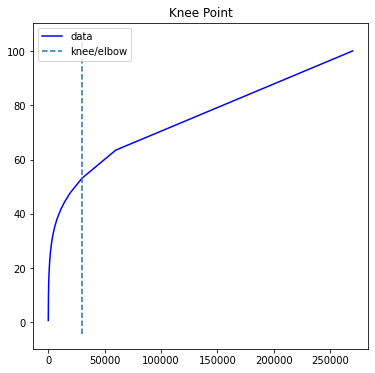

In [25]:
prefix_suffix_kneedle = KneeLocator(x=df_prefix_suffix_freq.cumul_ratio.index, y=df_prefix_suffix_freq.cumul_ratio, S=1.0, curve="concave", direction="increasing")
prefix_suffix_kneedle.plot_knee()

In [26]:
knee_point_prefix_suffix = round(prefix_suffix_kneedle.knee_y)
knee_point_prefix_suffix

53

In [27]:
df_prefix_suffix_knee = df_prefix_suffix_freq[df_prefix_suffix_freq.cumul_ratio <= knee_point_prefix_suffix]
df_prefix_suffix_knee

,prefix_suffix,frequency,ratio,cumul_ratio
0,+,4000,0.695522,0.695522
1,+n,1308,0.227436,0.922957
2,+m,912,0.158579,1.081536
3,+lar,872,0.151624,1.233160
4,+ler,810,0.140843,1.374003
...,...,...,...,...
29567,+nıtımdı,2,0.000348,52.998378
29568,+aharis,2,0.000348,52.998726
29569,+anfil,2,0.000348,52.999073
29570,+almoral,2,0.000348,52.999421


In [28]:
prefix_suffix_list = df_prefix_suffix_knee["prefix_suffix"].to_list()

In [29]:
disable_prefix_suffix_list = ["+anityi","+bidir","+workun","+düktörlere","+rysin","+ein","+ei","+x","+ren","+hul"]

In [30]:
set_prefix_suffix = set(prefix_suffix_list)
set_disable_prefix_suffix = set(disable_prefix_suffix_list)

In [31]:
prefix_suffix_custom_list = list(set_prefix_suffix.difference(set_disable_prefix_suffix))

In [32]:
df_prefix_suffix_custom = pd.DataFrame()
for i in prefix_suffix_custom_list:
    df_var = df_prefix_suffix[df_prefix_suffix["prefix_suffix"] == f"{i}"]
    df_prefix_suffix_custom = pd.concat([df_prefix_suffix_custom, df_var], axis=0)
df_prefix_suffix_custom.sort_values(by="word", inplace=True)
df_prefix_suffix_custom.reset_index(drop=True, inplace=True)
df_prefix_suffix_custom

,search_word,word,frequency,prefix_suffix,prefix_suffix_len
0,aa,aa,15799,+,0
1,aa,aaa,6402,+a,1
2,aa,aaaa,832,+aa,2
3,aa,aaaaa,245,+aaa,3
4,aa,aaaaaa,100,+aaaa,4
...,...,...,...,...,...
304651,şık,şıkız,21,+ız,2
304652,şık,şıkıştım,5,+ıştım,5
304653,şık,şıkıştır,9,+ıştır,5
304654,şık,şıkıştırdı,15,+ıştırdı,7


In [33]:
df_frequency_mean = df_prefix_suffix_custom.groupby(["search_word"])[["frequency"]].mean()
df_frequency_mean.reset_index(inplace=True)
df_frequency_mean.rename(columns={"frequency":"frequency_mean"}, inplace=True)
df_frequency_mean

,search_word,frequency_mean
0,aa,309.628743
1,aah,1320.636364
2,abd,440.929577
3,abi,465.378378
4,abla,466.584270
...,...,...
3995,şükürler,5946.250000
3996,şüphe,970.387283
3997,şüpheli,1100.277778
3998,şüphesiz,3945.500000


In [34]:
df_prefix_suffix_freq_mean = pd.merge(df_prefix_suffix_custom, df_frequency_mean, how="inner", on="search_word")
df_prefix_suffix_freq_mean

,search_word,word,frequency,prefix_suffix,prefix_suffix_len,frequency_mean
0,aa,aa,15799,+,0,309.628743
1,aa,aaa,6402,+a,1,309.628743
2,aa,aaaa,832,+aa,2,309.628743
3,aa,aaaaa,245,+aaa,3,309.628743
4,aa,aaaaaa,100,+aaaa,4,309.628743
...,...,...,...,...,...,...
304651,şık,şıkız,21,+ız,2,311.684932
304652,şık,şıkıştım,5,+ıştım,5,311.684932
304653,şık,şıkıştır,9,+ıştır,5,311.684932
304654,şık,şıkıştırdı,15,+ıştırdı,7,311.684932


In [35]:
df_prefix_suffix_freq_mean_select = df_prefix_suffix_freq_mean[(df_prefix_suffix_freq_mean.frequency >= df_prefix_suffix_freq_mean.frequency_mean)]
df_prefix_suffix_freq_mean_select.reset_index(drop=True, inplace=True)
df_prefix_suffix_freq_mean_select

,search_word,word,frequency,prefix_suffix,prefix_suffix_len,frequency_mean
0,aa,aa,15799,+,0,309.628743
1,aa,aaa,6402,+a,1,309.628743
2,aa,aaaa,832,+aa,2,309.628743
3,aa,aaaah,898,+aah,3,309.628743
4,aa,aaah,3499,+ah,2,309.628743
...,...,...,...,...,...,...
33921,şık,şıkkı,519,+kı,2,311.684932
33922,şık,şıklar,682,+lar,3,311.684932
33923,şık,şıksın,773,+sın,3,311.684932
33924,şık,şıktı,408,+tı,2,311.684932


In [36]:
df_prefix_suffix_freq_mean_select.search_word.nunique()

4000

In [37]:
df_prefix_suffix_freq_mean_select.word.nunique()

25419

In [38]:
if word_analysis:
    try:
        df_prefix_suffix_freq_mean_select.to_excel(f"{lang_folder.capitalize()}_{lang_pair.capitalize()}_{file_ext}_Word_Prefix_Suffix_Custom_Result.xlsx", index=False)
    except:
        df_prefix_suffix_freq_mean_select.to_csv(f"{lang_folder.capitalize()}_{lang_pair.capitalize()}_{file_ext}_Word_Prefix_Suffix_Custom_Result.csv", index=False)
else:
    try:
        df_prefix_suffix_freq_mean_select.to_excel(f"{lang_folder.capitalize()}_{lang_pair.capitalize()}_Shared_Word_Prefix_Suffix_Custom_Result.xlsx", index=False)
    except:
        df_prefix_suffix_freq_mean_select.to_csv(f"{lang_folder.capitalize()}_{lang_pair.capitalize()}_Shared_Word_Prefix_Suffix_Custom_Result.csv", index=False)

##### Copy Move And Delete

In [39]:
output_file1 = glob.glob(f"{lang_folder.capitalize()}_{lang_pair.capitalize()}_*_Prefix_Suffix_*Result.*")
output_file1

['Turkish_English_5000_Word_Prefix_Suffix_Custom_Result.xlsx']

In [40]:
for k in output_file1:
    source = k # source directory
    destination = f"/media/kurubal/SSD/Data Scientist/Work/Modern Ways/Project/Web Scrapping/Result/{lang_folder.capitalize()}/{lang_folder.capitalize()} {lang_pair.capitalize()}"
    shutil.copy2(source, destination)

In [41]:
for i in output_file1:
    try:
        os.remove(i)
    except:
        pass

In [42]:
output_file2 = glob.glob(f"{lang_folder.capitalize()}_{lang_pair.capitalize()}_*_Prefix_Suffix_*.*")
output_file2

['Turkish_English_5000_Word_Prefix_Suffix_All.csv',
 'Turkish_English_5000_Word_Prefix_Suffix_Select.xlsx']

In [43]:
for l in output_file2:
    source = l # source directory
    destination = f"/media/kurubal/SSD/Data Scientist/Work/Modern Ways/Project/Web Scrapping/Data/{lang_folder.capitalize()}/{lang_folder.capitalize()} {lang_pair.capitalize()}"
    shutil.copy2(source, destination)

In [44]:
for j in output_file2:
    try:
        os.remove(j)
    except:
        pass

### Concat Native And Etymology Prefix Suffix Result

In [3]:
import os
import pandas as pd
import numpy as np
import glob

In [4]:
# language pair
lang_folder = "Turkish"  # Arabic, English, French, German, Turkish, Spanish, Portuguese, Dutch, Italian ==> target language for learner
lang_pair = "English"  # Arabic, English, French, German, Turkish, Spanish, Portuguese, Dutch, Italian, Intersect ==> native language

# file extention
file_ext = 1000  # native word number

In [5]:
def lower_strip(x):
    try:
        var_low = x.lower()
        var_out = var_low.strip()
    except:
        var_out = x
    return var_out

In [6]:
native_file = glob.glob(f"/media/kurubal/SSD/Data Scientist/Work/Modern Ways/Project/Web Scrapping/Result/{lang_folder.capitalize()}/{lang_folder.capitalize()} {lang_pair.capitalize()}/{lang_folder.capitalize()}_{lang_pair.capitalize()}_{file_ext}_Word_Prefix_Suffix_Custom_Result_Manuel.xlsx")
native_file

['/media/kurubal/SSD/Data Scientist/Work/Modern Ways/Project/Web Scrapping/Result/Turkish/Turkish English/Turkish_English_200_Word_Prefix_Suffix_Custom_Result_Manuel.xlsx']

In [7]:
df_native = pd.read_excel(native_file[0])
df_native = df_native[["search_word","word"]]
df_native

,search_word,word
0,adam,adam
1,adam,adama
2,adam,adamdan
3,adam,adamdı
4,adam,adamdır
...,...,...
1618,şey,şeyler
1619,şey,şeylerden
1620,şey,şeylere
1621,şey,şeyleri


In [8]:
etymology_file = glob.glob(f"/media/kurubal/SSD/Data Scientist/Work/Modern Ways/Project/Web Scrapping/Result/{lang_folder.capitalize()}/{lang_folder.capitalize()} {lang_pair.capitalize()}/{lang_folder.capitalize()}_{lang_pair.capitalize()}_Shared_Word_Prefix_Suffix_Custom_Result.xlsx")
etymology_file

['/media/kurubal/SSD/Data Scientist/Work/Modern Ways/Project/Web Scrapping/Result/Turkish/Turkish English/Turkish_English_Shared_Word_Prefix_Suffix_Custom_Result.xlsx']

In [9]:
df_etmology = pd.read_excel(etymology_file[0])
df_etmology = df_etmology[["search_word","word"]]
df_etmology

,search_word,word
0,abaküs,abaküs
1,abandone,abandoned
2,abanoz,abanoz
3,abdomen,abdomende
4,abluka,abluka
...,...,...
6188,şut,şutu
6189,şut,şutunu
6190,şırınga,şırınga
6191,şırınga,şırıngayla


In [10]:
df_native_etymology_concat = pd.concat([df_native,df_etmology], axis=0)
df_native_etymology_concat

,search_word,word
0,adam,adam
1,adam,adama
2,adam,adamdan
3,adam,adamdı
4,adam,adamdır
...,...,...
6188,şut,şutu
6189,şut,şutunu
6190,şırınga,şırınga
6191,şırınga,şırıngayla


In [11]:
df_native_etymology_concat["search_word"] = df_native_etymology_concat["search_word"].apply(lambda x : lower_strip(x))
df_native_etymology_concat["word"] = df_native_etymology_concat["word"].apply(lambda x : lower_strip(x))
df_native_etymology_concat.drop_duplicates(inplace=True)
df_native_etymology_concat.reset_index(drop=True, inplace=True)
df_native_etymology_concat

,search_word,word
0,adam,adam
1,adam,adama
2,adam,adamdan
3,adam,adamdı
4,adam,adamdır
...,...,...
7811,şut,şutu
7812,şut,şutunu
7813,şırınga,şırınga
7814,şırınga,şırıngayla


In [12]:
df_native_etymology_concat.to_excel(f"/media/kurubal/SSD/Data Scientist/Work/Modern Ways/Project/Web Scrapping/Result/{lang_folder.capitalize()}/{lang_folder.capitalize()} \
{lang_pair.capitalize()}/{lang_folder.capitalize()}_{lang_pair.capitalize()}_{file_ext}_Native_And_Shared_Word_Prefix_Suffix_Custom_Concat.xlsx", index=False)

### Temp

In [ ]:
# English, French, German, Spanish, Portuguese, Dutch, Italian

In [29]:
#df_pair1 = pd.read_excel(f"/media/kurubal/SSD/Data Scientist/Work/Modern Ways/Project/Web Scrapping/Result/Turkish/\
#Turkish English/Turkish_English_Shared_Vocabulary.xlsx")
#df_pair1

In [31]:
#df_pair2 = pd.read_excel(f"/media/kurubal/SSD/Data Scientist/Work/Modern Ways/Project/Web Scrapping/Result/Turkish/\
#Turkish French/Turkish_French_Shared_Vocabulary.xlsx")
#df_pair2

In [32]:
#df_pair3 = pd.read_excel(f"/media/kurubal/SSD/Data Scientist/Work/Modern Ways/Project/Web Scrapping/Result/Turkish/\
#Turkish German/Turkish_German_Shared_Vocabulary.xlsx")
#df_pair3

In [33]:
#df_pair4 = pd.read_excel(f"/media/kurubal/SSD/Data Scientist/Work/Modern Ways/Project/Web Scrapping/Result/Turkish/\
#Turkish Spanish/Turkish_Spanish_Shared_Vocabulary.xlsx")
#df_pair4

In [34]:
#df_pair5 = pd.read_excel(f"/media/kurubal/SSD/Data Scientist/Work/Modern Ways/Project/Web Scrapping/Result/Turkish/\
#Turkish Portuguese/Turkish_Portuguese_Shared_Vocabulary.xlsx")
#df_pair5

In [35]:
#df_pair6 = pd.read_excel(f"/media/kurubal/SSD/Data Scientist/Work/Modern Ways/Project/Web Scrapping/Result/Turkish/\
#Turkish Dutch/Turkish_Dutch_Shared_Vocabulary.xlsx")
#df_pair6

In [36]:
#df_pair7 = pd.read_excel(f"/media/kurubal/SSD/Data Scientist/Work/Modern Ways/Project/Web Scrapping/Result/Turkish/\
#Turkish Italian/Turkish_Italian_Shared_Vocabulary.xlsx")
#df_pair7

In [ ]:
#set1 = set(df_pair1.dict_entry_main)
#set2 = set(df_pair2.dict_entry_main)
#set3 = set(df_pair3.dict_entry_main)
#set4 = set(df_pair4.dict_entry_main)
#set5 = set(df_pair5.dict_entry_main)
#set6 = set(df_pair6.dict_entry_main)
#set7 = set(df_pair7.dict_entry_main)

In [ ]:
#df_ety_intersect = pd.DataFrame((((((set7.intersection(set6)).intersection(set5)).intersection(set4)).intersection(set3)).intersection(set2)).intersection(set1), columns=["dict_entry_main"])
#df_ety_intersect

In [ ]:
#df_ety_intersect.to_excel("Turkish_Intersect_Shared_Vocabulary.xlsx", index=False)

In [19]:
#df_intersect = pd.read_excel("/media/kurubal/SSD/Data Scientist/Work/Modern Ways/Project/Web Scrapping/Result/Turkish/Turkish Intersect/Turkish_Intersect_Shared_Vocabulary.xlsx")
#df_intersect  # English, French, German, Spanish, Portuguese, Dutch, Italian

In [20]:
#df_pair1_merge = pd.merge(df_intersect,df_pair1, how="left", on="dict_entry_main")
#df_pair1_merge.drop_duplicates(inplace=True)
#df_pair1_merge

In [21]:
#df_pair2_merge = pd.merge(df_pair1_merge,df_pair2, how="left", on="dict_entry_main")
#df_pair2_merge.drop_duplicates(inplace=True)
#df_pair2_merge

In [22]:
#df_pair3_merge = pd.merge(df_pair2_merge,df_pair3, how="left", on="dict_entry_main")
#df_pair3_merge.drop_duplicates(inplace=True)
#df_pair3_merge

In [23]:
#df_pair4_merge = pd.merge(df_pair3_merge,df_pair4, how="left", on="dict_entry_main")
#df_pair4_merge.drop_duplicates(inplace=True)
#df_pair4_merge

In [24]:
#df_pair5_merge = pd.merge(df_pair4_merge,df_pair5, how="left", on="dict_entry_main")
#df_pair5_merge.drop_duplicates(inplace=True)
#df_pair5_merge

In [25]:
#df_pair6_merge = pd.merge(df_pair5_merge,df_pair6, how="left", on="dict_entry_main")
#df_pair6_merge.drop_duplicates(inplace=True)
#df_pair6_merge

In [26]:
#df_pair7_merge = pd.merge(df_pair6_merge,df_pair7, how="left", on="dict_entry_main")
#df_pair7_merge.drop_duplicates(inplace=True)
#df_pair7_merge

In [27]:
#df_pair7_merge.rename(columns={"dict_entry_main":"turkish_word_intersect"}, inplace=True)
#df_pair7_merge

In [28]:
#df_pair7_merge.to_excel("Turkish_Intersect_Shared_Vocabulary_With_Other_Languages.xlsx", index=False)